In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.fftpack import fft,ifft
import pandas as pd
from scipy.optimize import minimize
from scipy.optimize import basinhopping
from iminuit import Minuit

import emcee
from pprint import pprint
import time
from multiprocessing import Pool

import random

## 2002 模型检验

In [2]:
# 似然函数 p; D = -2 ln p

def twi_minus_loglikelihood_02(log_A,log_f_b,alpha_H,log_poisson):
    alpha_L = 1.0
    
    perdata02 = pd.read_csv("perlist02_s.csv")
    f = perdata02['f']
    per = perdata02['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append(((f[i]**(-alpha_L))/(1+(f[i]/(10**log_f_b))**(alpha_H-alpha_L)))*(10**log_A)+(10**log_poisson))
     
    
    length = len(perdata02)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    # print (D)
    return D

In [3]:
m02=Minuit(twi_minus_loglikelihood_02,log_A=math.log(0.005,10),log_f_b=math.log(1.7E-4,10),alpha_H=3.8,log_poisson=0.0,
         error_log_A=0.1,error_log_f_b=0.1,error_alpha_H=0.02,error_log_poisson=0.1,
         limit_log_A=(-3,-1), limit_log_f_b=(-7,-2),limit_alpha_H=(1.0,5.0),limit_log_poisson=(-1,3),
         errordef=1)

m02.migrad()

pprint(m02.fval)

FCN = 3214.702039003693 
 TOTAL NCALL = 322 
 NCALLS = 322 
 
 
 EDM = 2.97750701786514e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,log_A,-1.58774,0.174838,,,-3,-1,No
1,log_f_b,-3.63835,0.222479,,,-7,-2,No
2,alpha_H,2.65271,0.468888,,,1,5,No
3,log_poisson,0.410804,0.0214614,,,-1,3,No


3214.702039003693


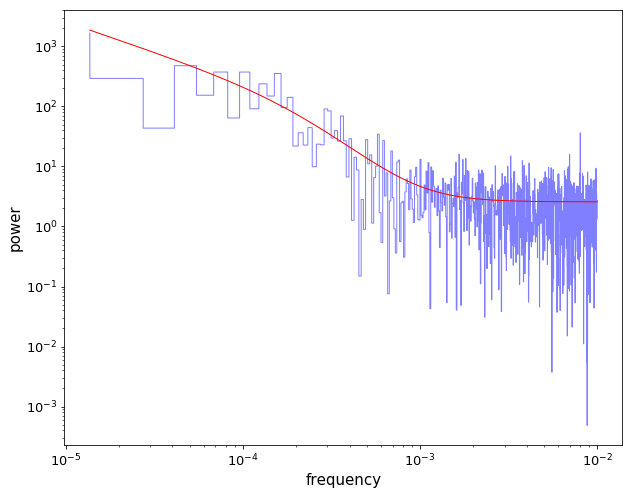

In [4]:
perdata02 = pd.read_csv("perlist02_s.csv")
f_02 = perdata02['f']
per_02 = perdata02['per']

alpha_L = 1.0
log_A,log_f_b,alpha_H,log_poisson = m02.values[0],m02.values[1],m02.values[2],m02.values[3]

model_02 = []
f_length_02 = len(f_02)
for i in range(f_length_02):
    model_02.append(((f_02[i]**(-alpha_L))/(1+(f_02[i]/(10**log_f_b))**(alpha_H-alpha_L)))*(10**log_A)+(10**log_poisson))

plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f_02, per_02, color="b", alpha=0.5, linewidth=1)
plt.plot(f_02, model_02, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=15)
plt.ylabel("power",fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

## 2002 模型比较

In [5]:
def twi_minus_loglikelihood_nobreak_02(log_A,alpha,log_poisson):
    alpha_L = 1.0
    
    perdata02 = pd.read_csv("perlist02_s.csv")
    f = perdata02['f']
    per = perdata02['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append((f[i]**(-alpha))*(10**log_A)+(10**log_poisson))
     
    
    length = len(perdata02)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    # print (D)
    return D

In [6]:
n02=Minuit(twi_minus_loglikelihood_nobreak_02,log_A=-9,alpha=2.0,log_poisson=0.0,
         error_log_A=0.1,error_alpha=0.01,error_log_poisson=0.1,
         limit_log_A=(-6,1),limit_alpha=(1.0,5.0),limit_log_poisson=(0,3),
         errordef=1)

n02.migrad()

print(n02.fval)

FCN = 3220.953928618869 
 TOTAL NCALL = 107 
 NCALLS = 107 
 
 
 EDM = 2.5610160533153028e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,log_A,-5.14833,0.509945,,,-6,1,No
1,alpha,1.86817,0.149589,,,1,5,No
2,log_poisson,0.385199,0.0227407,,,0,3,No


3220.953928618869


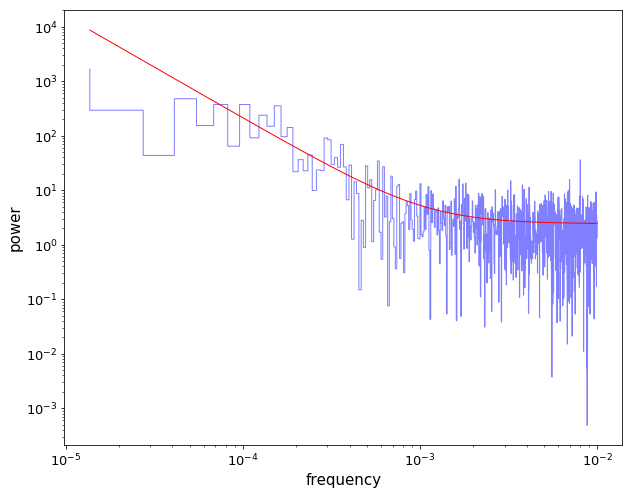

In [7]:
log_A,alpha,log_poisson = n02.values[0],n02.values[1],n02.values[2]

model_nob_02 = []
f_length_02 = len(f_02)
for i in range(f_length_02):
    model_nob_02.append((f_02[i]**(-alpha))*(10**log_A)+(10**log_poisson))

plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f_02, per_02, color="b", alpha=0.5, linewidth=1)
plt.plot(f_02, model_nob_02, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=15)
plt.ylabel("power",fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

6.251889615176424


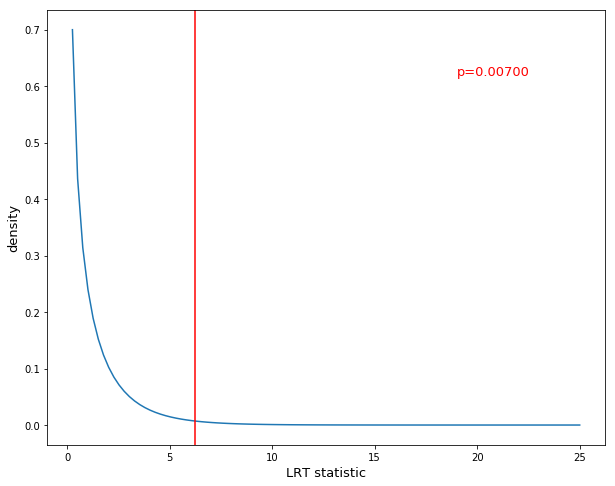

In [8]:
import scipy.stats as stats

# LRT statistic
T = n02.fval-m02.fval
print(T)

p = stats.chi2.pdf(T,1)
p1 = ("%.5f" % p)
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
plt.plot(np.linspace(0,25,100),stats.chi2.pdf(np.linspace(0,25,100),df=1))
plt.axvline(T,color="r")
plt.text(0.8,0.85,'p=%s'%p1,color='red',ha='center',transform=ax.transAxes,fontsize=13)
plt.xlabel("LRT statistic",fontsize=13)
plt.ylabel("density",fontsize=13)
plt.show()

## 2008(1) 模型检验

In [9]:
# 似然函数 p; D = -2 ln p

def twi_minus_loglikelihood_081(log_A,log_f_b,alpha_H,log_poisson):
    alpha_L = 1.0
    
    perdata081 = pd.read_csv("perlist081_s.csv")
    f = perdata081['f']
    per = perdata081['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append(((f[i]**(-alpha_L))/(1+(f[i]/(10**log_f_b))**(alpha_H-alpha_L)))*(10**log_A)+(10**log_poisson))
     
    
    length = len(perdata081)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    # print (D)
    return D

In [10]:
m081=Minuit(twi_minus_loglikelihood_081,log_A=math.log(0.005,10),log_f_b=math.log(1.7E-4,10),alpha_H=3.8,log_poisson=0.0,
         error_log_A=0.1,error_log_f_b=0.1,error_alpha_H=0.02,error_log_poisson=0.1,
         limit_log_A=(-3,1), limit_log_f_b=(-5,-2),limit_alpha_H=(1.0,5.0),limit_log_poisson=(-1,3),
         errordef=1)

m081.migrad()

pprint(m081.fval)

FCN = 3062.937709732817 
 TOTAL NCALL = 463 
 NCALLS = 463 
 
 
 EDM = 1.7823367158499973e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,log_A,-1.46385,0.165562,,,-3,1,No
1,log_f_b,-3.59151,0.219987,,,-5,-2,No
2,alpha_H,2.55264,0.333295,,,1,5,No
3,log_poisson,0.226939,0.0221392,,,-1,3,No


3062.937709732817


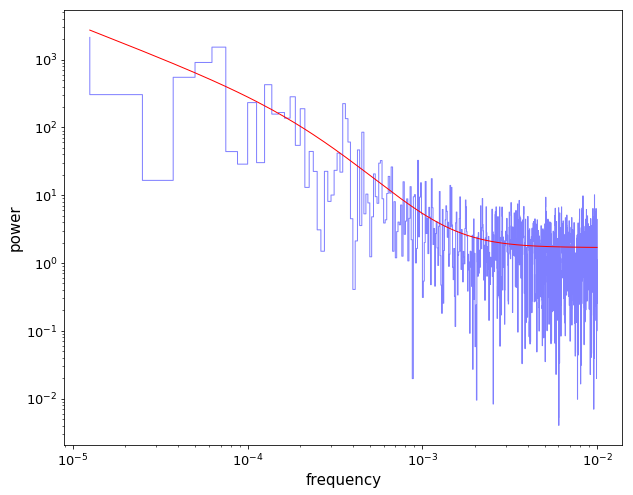

In [11]:
perdata081 = pd.read_csv("perlist081_s.csv")
f_081 = perdata081['f']
per_081 = perdata081['per']

alpha_L = 1.0
log_A,log_f_b,alpha_H,log_poisson = m081.values[0],m081.values[1],m081.values[2],m081.values[3]

model_081 = []
f_length_081 = len(f_081)
for i in range(f_length_081):
    model_081.append(((f_081[i]**(-alpha_L))/(1+(f_081[i]/(10**log_f_b))**(alpha_H-alpha_L)))*(10**log_A)+(10**log_poisson))

plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f_081, per_081, color="b", alpha=0.5, linewidth=1)
plt.plot(f_081, model_081, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=15)
plt.ylabel("power",fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

## 2008(1) 模型比较

In [12]:
def twi_minus_loglikelihood_nobreak_081(log_A,alpha,log_poisson):
    alpha_L = 1.0
    
    perdata081 = pd.read_csv("perlist081_s.csv")
    f = perdata081['f']
    per = perdata081['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append((f[i]**(-alpha))*(10**log_A)+(10**log_poisson))
     
    
    length = len(perdata081)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    # print (D)
    return D

In [13]:
n081=Minuit(twi_minus_loglikelihood_nobreak_081,log_A=-7,alpha=2.0,log_poisson=0.0,
         error_log_A=0.1,error_alpha=0.01,error_log_poisson=0.1,
         limit_log_A=(-8,-1),limit_alpha=(1.0,5.0),limit_log_poisson=(-1,3),
         errordef=1)

n081.migrad()

pprint(n081.fval)

FCN = 3071.0671940308926 
 TOTAL NCALL = 102 
 NCALLS = 102 
 
 
 EDM = 1.0579772844849659e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,log_A,-5.1285,0.368891,,,-8,-1,No
1,alpha,1.9088,0.11214,,,1,5,No
2,log_poisson,0.19622,0.0236292,,,-1,3,No


3071.0671940308926


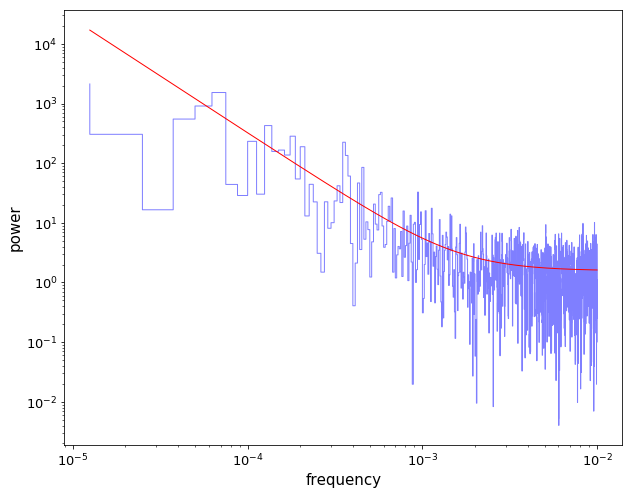

In [14]:
log_A,alpha,log_poisson = n081.values[0],n081.values[1],n081.values[2]

model_nob_081 = []
f_length_081 = len(f_081)
for i in range(f_length_081):
    model_nob_081.append((f_081[i]**(-alpha))*(10**log_A)+(10**log_poisson))

plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f_081, per_081, color="b", alpha=0.5, linewidth=1)
plt.plot(f_081, model_nob_081, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=15)
plt.ylabel("power",fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

8.129484298075567


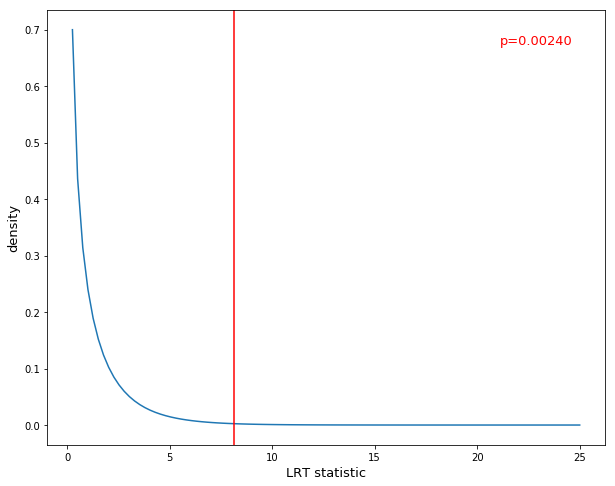

In [15]:
import scipy.stats as stats

# LRT statistic
T = n081.fval-m081.fval
print(T)

p = stats.chi2.pdf(T,1)
p1 = ("%.5f" % p)
plt.figure(figsize=(10,8))
plt.plot(np.linspace(0,25,100),stats.chi2.pdf(np.linspace(0,25,100),df=1))
plt.axvline(T,color="r")
plt.text(0.8,0.85,'p=%s'%p1,color='red',ha='center',transform=ax.transAxes,fontsize=13)
plt.xlabel("LRT statistic",fontsize=13)
plt.ylabel("density",fontsize=13)
plt.show()

## 2010(1) 模型检验

In [16]:
# 似然函数 p; D = -2 ln p

def twi_minus_loglikelihood_101(log_A,log_f_b,alpha_H,log_poisson):
    alpha_L = 1.0
    
    perdata101 = pd.read_csv("perlist101_s.csv")
    f = perdata101['f']
    per = perdata101['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append(((f[i]**(-alpha_L))/(1+(f[i]/(10**log_f_b))**(alpha_H-alpha_L)))*(10**log_A)+(10**log_poisson))
     
    
    length = len(perdata101)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    # print (D)
    return D

In [17]:
m101=Minuit(twi_minus_loglikelihood_101,log_A=math.log(0.005,10),log_f_b=math.log(1.7E-4,10),alpha_H=3.8,log_poisson=0.0,
         error_log_A=0.1,error_log_f_b=0.1,error_alpha_H=0.02,error_log_poisson=0.1,
         limit_log_A=(-3,0), limit_log_f_b=(-5,-2),limit_alpha_H=(1.0,5.0),limit_log_poisson=(-1,3),
         errordef=1)

m101.migrad()

pprint(m101.fval)

FCN = 4341.438046335884 
 TOTAL NCALL = 486 
 NCALLS = 486 
 
 
 EDM = 9.714978438702112e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,log_A,-1.07081,0.188032,,,-3,0,No
1,log_f_b,-3.92434,0.209428,,,-5,-2,No
2,alpha_H,2.60282,0.275072,,,1,5,No
3,log_poisson,0.371035,0.0190981,,,-1,3,No


4341.438046335884


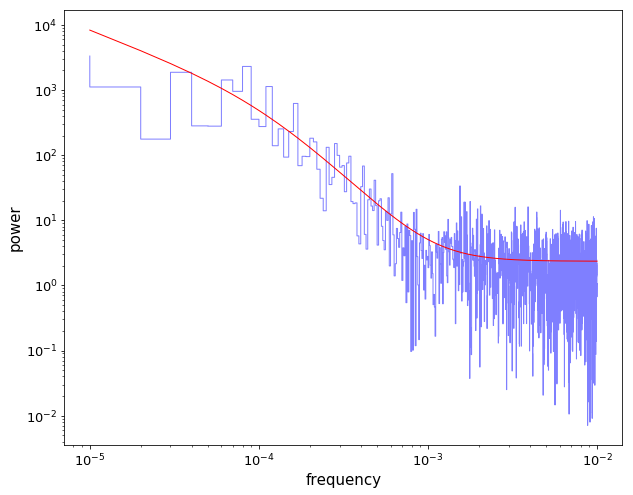

In [18]:
perdata101 = pd.read_csv("perlist101_s.csv")
f_101 = perdata101['f']
per_101 = perdata101['per']

alpha_L = 1.0
log_A,log_f_b,alpha_H,log_poisson = m101.values[0],m101.values[1],m101.values[2],m101.values[3]

model_101 = []
f_length_101 = len(f_101)
for i in range(f_length_101):
    model_101.append(((f_101[i]**(-alpha_L))/(1+(f_101[i]/(10**log_f_b))**(alpha_H-alpha_L)))*(10**log_A)+(10**log_poisson))

plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f_101, per_101, color="b", alpha=0.5, linewidth=1)
plt.plot(f_101, model_101, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=15)
plt.ylabel("power",fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

## 2010(1) 模型比较

In [19]:
def twi_minus_loglikelihood_nobreak_101(log_A,alpha,log_poisson):
    alpha_L = 1.0
    
    perdata101 = pd.read_csv("perlist101_s.csv")
    f = perdata101['f']
    per = perdata101['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append((f[i]**(-alpha))*(10**log_A)+(10**log_poisson))
     
    
    length = len(perdata101)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    # print (D)
    return D

In [20]:
n101=Minuit(twi_minus_loglikelihood_nobreak_101,log_A=-7,alpha=2.0,log_poisson=0.0,
         error_log_A=0.1,error_alpha=0.01,error_log_poisson=0.1,
         limit_log_A=(-8,-2),limit_alpha=(1.0,5.0),limit_log_poisson=(-1,3),
         errordef=1)

n101.migrad()

pprint(n101.fval)

FCN = 4349.081012447884 
 TOTAL NCALL = 83 
 NCALLS = 83 
 
 
 EDM = 2.4515730892986745e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,log_A,-5.83014,0.419541,,,-8,-2,No
1,alpha,2.12324,0.121892,,,1,5,No
2,log_poisson,0.350197,0.0191397,,,-1,3,No


4349.081012447884


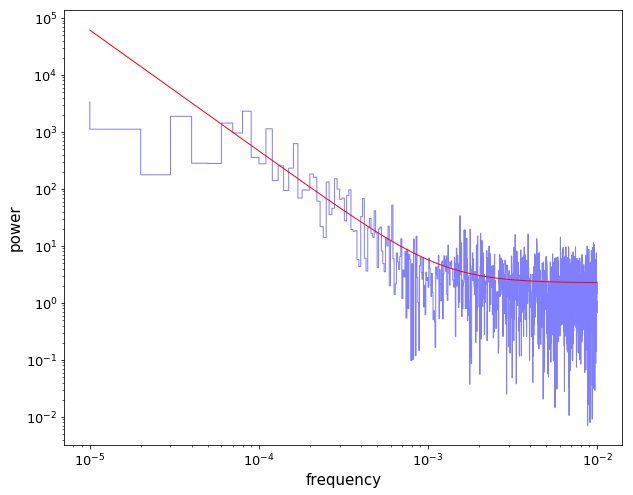

In [21]:
log_A,alpha,log_poisson = n101.values[0],n101.values[1],n101.values[2]

model_nob_101 = []
f_length_101 = len(f_101)
for i in range(f_length_101):
    model_nob_101.append((f_101[i]**(-alpha))*(10**log_A)+(10**log_poisson))

plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f_101, per_101, color="b", alpha=0.5, linewidth=1)
plt.plot(f_101, model_nob_101, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=15)
plt.ylabel("power",fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

7.642966112000067


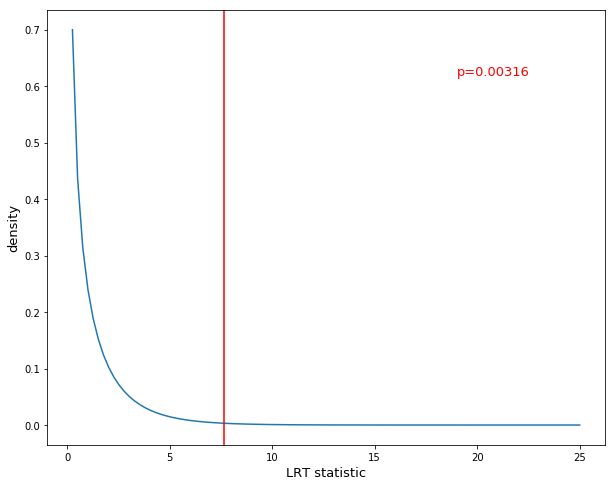

In [22]:
import scipy.stats as stats

# LRT statistic
T = n101.fval-m101.fval
print(T)

p = stats.chi2.pdf(T,1)
p1 = ("%.5f" % p)
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
plt.plot(np.linspace(0,25,100),stats.chi2.pdf(np.linspace(0,25,100),df=1))
plt.axvline(T,color="r")
plt.text(0.8,0.85,'p=%s'%p1,color='red',ha='center',transform=ax.transAxes,fontsize=13)
plt.xlabel("LRT statistic",fontsize=13)
plt.ylabel("density",fontsize=13)
plt.show()

## 2007(4) 模型检验

In [23]:
# 似然函数 p; D = -2 ln p

def twi_minus_loglikelihood_074(log_A,log_f_b,alpha_H,log_poisson):
    alpha_L = 1.0
    
    perdata074 = pd.read_csv("perlist074_s.csv")
    f = perdata074['f']
    per = perdata074['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append(((f[i]**(-alpha_L))/(1+(f[i]/(10**log_f_b))**(alpha_H-alpha_L)))*(10**log_A)+(10**log_poisson))
     
    
    length = len(perdata074)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    # print (D)
    return D

In [24]:
m074=Minuit(twi_minus_loglikelihood_074,log_A=math.log(0.005,10),log_f_b=math.log(1.7E-4,10),alpha_H=3.8,log_poisson=0.0,
         error_log_A=0.1,error_log_f_b=0.1,error_alpha_H=0.02,error_log_poisson=0.1,
         limit_log_A=(-3,1), limit_log_f_b=(-5,-2),limit_alpha_H=(1.0,5.0),limit_log_poisson=(-1,3),
         errordef=1)

m074.migrad()

pprint(m074.fval)

FCN = 1619.4580321704075 
 TOTAL NCALL = 348 
 NCALLS = 348 
 
 
 EDM = 8.745396347429615e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,log_A,-1.49206,0.176376,,,-3,1,No
1,log_f_b,-3.43768,0.185708,,,-5,-2,No
2,alpha_H,3.15604,0.586506,,,1,5,No
3,log_poisson,0.277423,0.0263441,,,-1,3,No


1619.4580321704075


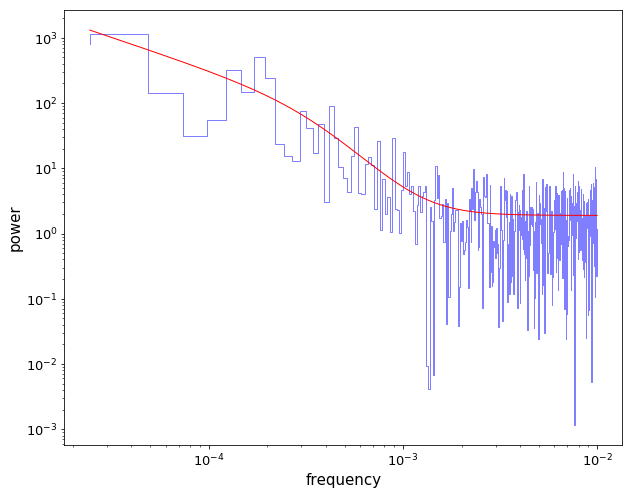

In [25]:
perdata074 = pd.read_csv("perlist074_s.csv")
f_074 = perdata074['f']
per_074 = perdata074['per']

alpha_L = 1.0
log_A,log_f_b,alpha_H,log_poisson = m074.values[0],m074.values[1],m074.values[2],m074.values[3]

model_074 = []
f_length_074 = len(f_074)
for i in range(f_length_074):
    model_074.append(((f_074[i]**(-alpha_L))/(1+(f_074[i]/(10**log_f_b))**(alpha_H-alpha_L)))*(10**log_A)+(10**log_poisson))

plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f_074, per_074, color="b", alpha=0.5, linewidth=1)
plt.plot(f_074, model_074, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=15)
plt.ylabel("power",fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

## 2007(4) 模型比较

In [26]:
def twi_minus_loglikelihood_nobreak_074(log_A,alpha,log_poisson):
    alpha_L = 1.0
    
    perdata074 = pd.read_csv("perlist074_s.csv")
    f = perdata074['f']
    per = perdata074['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append((f[i]**(-alpha))*(10**log_A)+(10**log_poisson))
     
    
    length = len(perdata074)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    # print (D)
    return D

In [27]:
n074=Minuit(twi_minus_loglikelihood_nobreak_074,log_A=-7,alpha=2.0,log_poisson=0.0,
         error_log_A=0.1,error_alpha=0.01,error_log_poisson=0.1,
         limit_log_A=(-8,0),limit_alpha=(1.0,5.0),limit_log_poisson=(-1,3),
         errordef=1)

n074.migrad()

pprint(n074.fval)

FCN = 1627.3035185877388 
 TOTAL NCALL = 72 
 NCALLS = 72 
 
 
 EDM = 6.914047896297472e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,log_A,-5.75282,0.590521,,,-8,0,No
1,alpha,2.10691,0.179247,,,1,5,No
2,log_poisson,0.25077,0.0289495,,,-1,3,No


1627.3035185877388


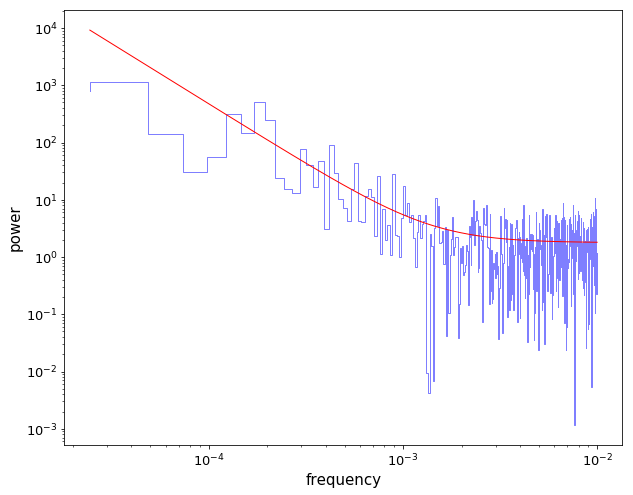

In [28]:
log_A,alpha,log_poisson = n074.values[0],n074.values[1],n074.values[2]

model_nob_074 = []
f_length_074 = len(f_074)
for i in range(f_length_074):
    model_nob_074.append((f_074[i]**(-alpha))*(10**log_A)+(10**log_poisson))

plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f_074, per_074, color="b", alpha=0.5, linewidth=1)
plt.plot(f_074, model_nob_074, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=15)
plt.ylabel("power",fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

7.845486417331358


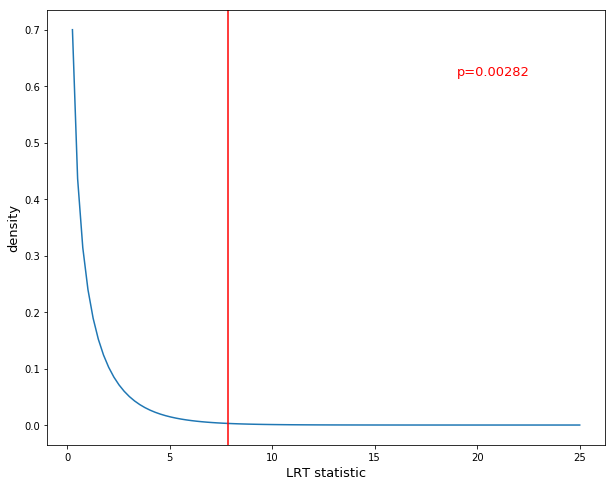

In [29]:
import scipy.stats as stats

# LRT statistic
T = n074.fval-m074.fval
print(T)

p = stats.chi2.pdf(T,1)
p1 = ("%.5f" % p)
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
plt.plot(np.linspace(0,25,100),stats.chi2.pdf(np.linspace(0,25,100),df=1))
plt.axvline(T,color="r")
plt.text(0.8,0.85,'p=%s'%p1,color='red',ha='center',transform=ax.transAxes,fontsize=13)
plt.xlabel("LRT statistic",fontsize=13)
plt.ylabel("density",fontsize=13)
plt.show()

## 2007(2) 模型检验

In [30]:
# 似然函数 p; D = -2 ln p

def twi_minus_loglikelihood_072(log_A,log_f_b,alpha_H,log_poisson):
    alpha_L = 1.0
    
    perdata072 = pd.read_csv("perlist072_s.csv")
    f = perdata072['f']
    per = perdata072['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append(((f[i]**(-alpha_L))/(1+(f[i]/(10**log_f_b))**(alpha_H-alpha_L)))*(10**log_A)+(10**log_poisson))
     
    
    length = len(perdata072)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    # print (D)
    return D

In [31]:
m072=Minuit(twi_minus_loglikelihood_072,log_A=math.log(0.005,10),log_f_b=math.log(1.7E-4,10),alpha_H=3.8,log_poisson=0.0,
         error_log_A=0.1,error_log_f_b=0.1,error_alpha_H=0.02,error_log_poisson=0.1,
         limit_log_A=(-3,1), limit_log_f_b=(-5,-2),limit_alpha_H=(1.0,5.0),limit_log_poisson=(-1,3),
         errordef=1)

m072.migrad()

pprint(m072.fval)

FCN = 2066.3372445045256 
 TOTAL NCALL = 238 
 NCALLS = 238 
 
 
 EDM = 2.5215803857866557e-07 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,log_A,-0.886168,0.272928,,,-3,1,No
1,log_f_b,-3.74142,0.292191,,,-5,-2,No
2,alpha_H,2.93409,0.57887,,,1,5,No
3,log_poisson,0.589079,0.0278627,,,-1,3,No


2066.3372445045256


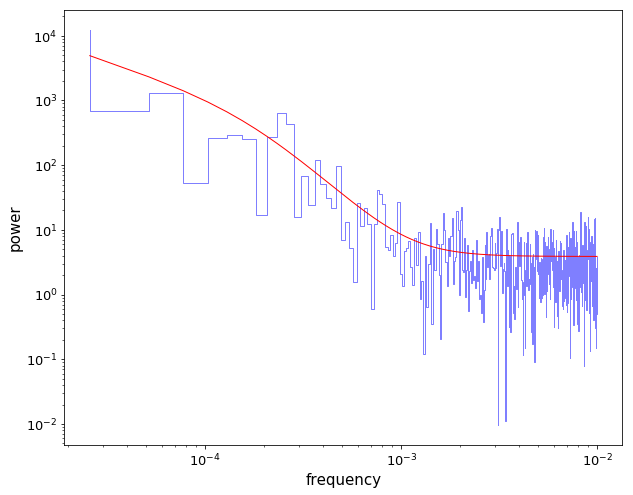

In [32]:
perdata072 = pd.read_csv("perlist072_s.csv")
f_072 = perdata072['f']
per_072 = perdata072['per']

alpha_L = 1.0
log_A,log_f_b,alpha_H,log_poisson = m072.values[0],m072.values[1],m072.values[2],m072.values[3]

model_072 = []
f_length_072 = len(f_072)
for i in range(f_length_072):
    model_072.append(((f_072[i]**(-alpha_L))/(1+(f_072[i]/(10**log_f_b))**(alpha_H-alpha_L)))*(10**log_A)+(10**log_poisson))

plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f_072, per_072, color="b", alpha=0.5, linewidth=1)
plt.plot(f_072, model_072, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=15)
plt.ylabel("power",fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

## 2007(2) 模型比较

In [33]:
def twi_minus_loglikelihood_nobreak_072(log_A,alpha,log_poisson):
    alpha_L = 1.0
    
    perdata072 = pd.read_csv("perlist072_s.csv")
    f = perdata072['f']
    per = perdata072['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append((f[i]**(-alpha))*(10**log_A)+(10**log_poisson))
     
    
    length = len(perdata072)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    # print (D)
    return D

In [34]:
n072=Minuit(twi_minus_loglikelihood_nobreak_072,log_A=-7,alpha=2.0,log_poisson=0.0,
         error_log_A=0.1,error_alpha=0.01,error_log_poisson=0.1,
         limit_log_A=(-8,-1),limit_alpha=(1.0,5.0),limit_log_poisson=(-1,3),
         errordef=1)

n072.migrad()

pprint(n072.fval)

FCN = 2069.5050171564326 
 TOTAL NCALL = 103 
 NCALLS = 103 
 
 
 EDM = 7.951714615125682e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,log_A,-5.94022,0.612688,,,-8,-1,No
1,alpha,2.23752,0.183137,,,1,5,No
2,log_poisson,0.56951,0.0280002,,,-1,3,No


2069.5050171564326


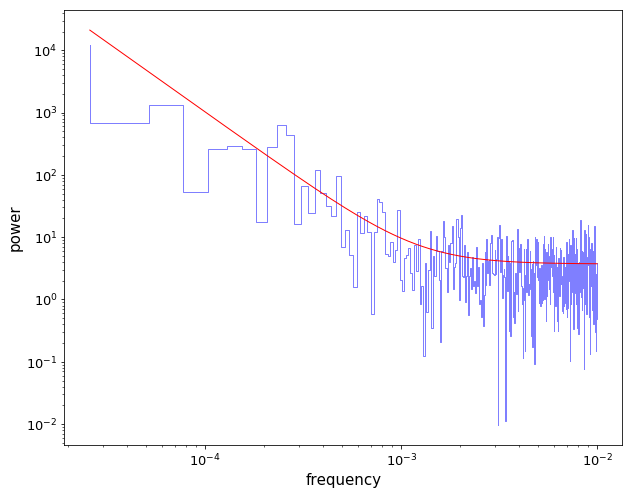

In [35]:
log_A,alpha,log_poisson = n072.values[0],n072.values[1],n072.values[2]

model_nob_072 = []
f_length_072 = len(f_072)
for i in range(f_length_072):
    model_nob_072.append((f_072[i]**(-alpha))*(10**log_A)+(10**log_poisson))

plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f_072, per_072, color="b", alpha=0.5, linewidth=1)
plt.plot(f_072, model_nob_072, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=15)
plt.ylabel("power",fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

3.167772651906944


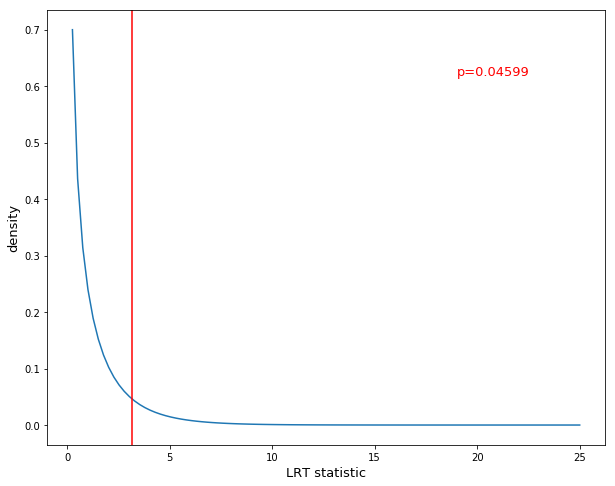

In [36]:
import scipy.stats as stats

# LRT statistic
T = n072.fval-m072.fval
print(T)

p = stats.chi2.pdf(T,1)
p1 = ("%.5f" % p)
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
plt.plot(np.linspace(0,25,100),stats.chi2.pdf(np.linspace(0,25,100),df=1))
plt.axvline(T,color="r")
plt.text(0.8,0.85,'p=%s'%p1,color='red',ha='center',transform=ax.transAxes,fontsize=13)
plt.xlabel("LRT statistic",fontsize=13)
plt.ylabel("density",fontsize=13)
plt.show()

## 综合结果

In [37]:
data02 = pd.read_csv("energy_1h0707_02.csv")  
x02 = data02['x']
y02 = data02['y']
xerr02 = data02['xerr']
yerr02 = data02['yerr']

data081 = pd.read_csv("energy_1h0707_081.csv")  
x081 = data081['x']
y081 = data081['y']
xerr081 = data081['xerr']
yerr081 = data081['yerr']

data101 = pd.read_csv("energy_1h0707_101.csv")  
x101 = data101['x']
y101 = data101['y']
xerr101 = data101['xerr']
yerr101 = data101['yerr']

data074 = pd.read_csv("energy_1h0707_074.csv")  
x074 = data074['x']
y074 = data074['y']
xerr074 = data074['xerr']
yerr074 = data074['yerr']

data072 = pd.read_csv("energy_1h0707_072.csv")  
x072 = data072['x']
y072 = data072['y']
xerr072 = data072['xerr']
yerr072 = data072['yerr']

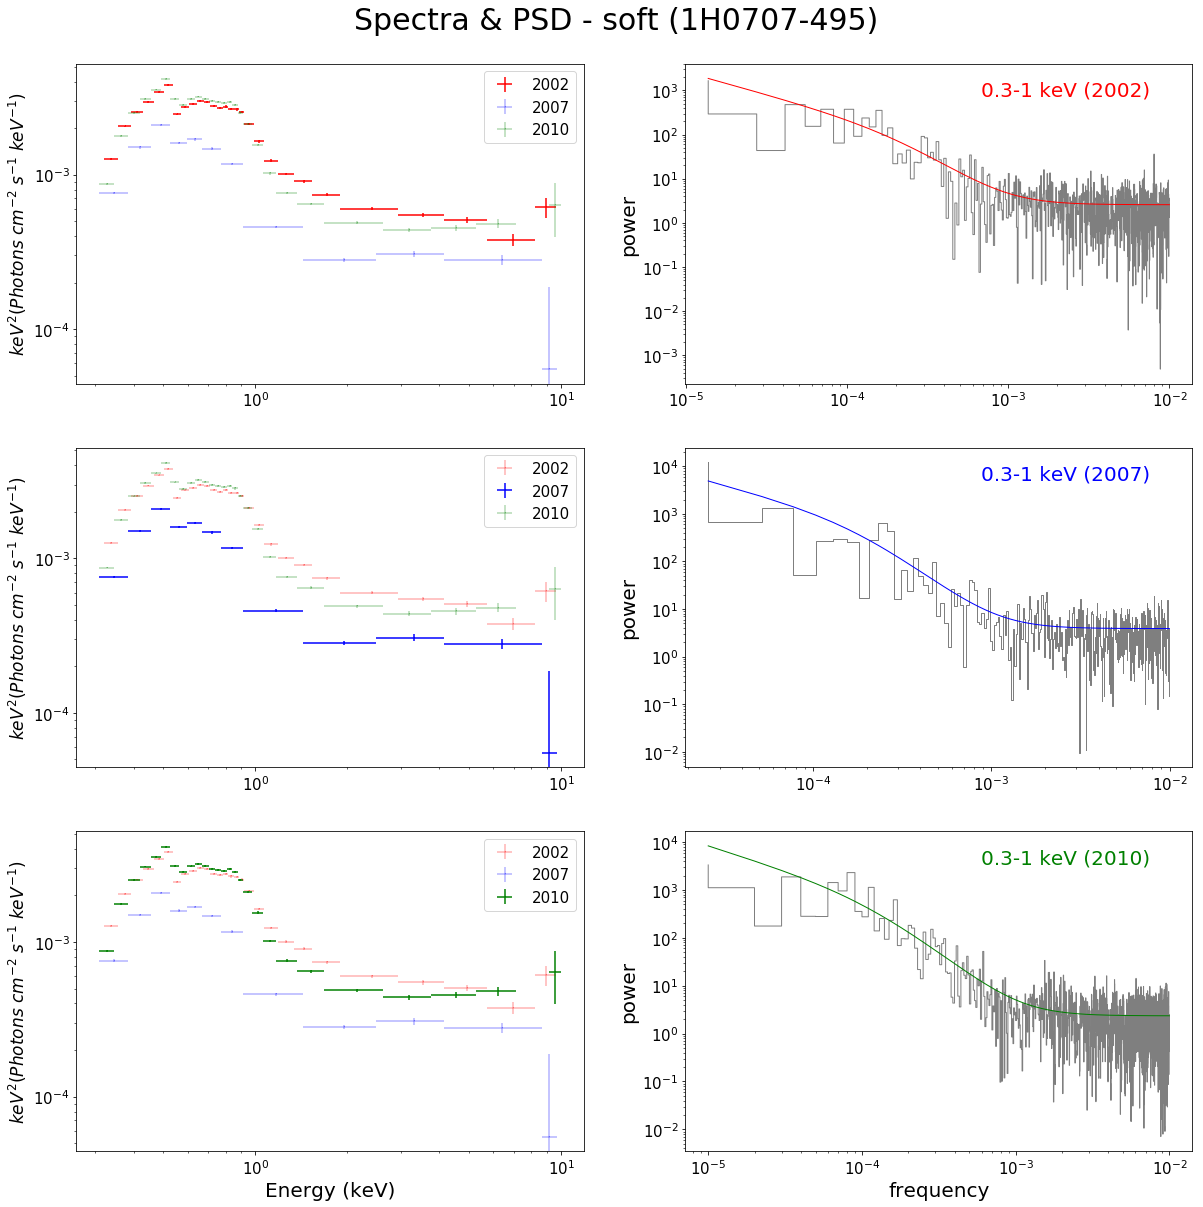

In [38]:
fig= plt.figure(figsize=(20,20))
ax1 = plt.subplot(321)
ax2 = plt.subplot(322)
ax3 = plt.subplot(323)
ax4 = plt.subplot(324)
ax5 = plt.subplot(325)
ax6 = plt.subplot(326)



ax1.loglog()
ax1.errorbar(x02, y02, yerr=yerr02, xerr=xerr02, fmt=',r', label='2002')
#ax1.errorbar(x081, y081, yerr=yerr081, xerr=xerr081, fmt=',b', alpha=0.3, label='2008')
ax1.errorbar(x072, y072, yerr=yerr072, xerr=xerr072, fmt=',b', alpha=0.3, label='2007')
ax1.errorbar(x101, y101, yerr=yerr101, xerr=xerr101, fmt=',g', alpha=0.3, label='2010')
#ax1.set_xlabel("Energy (keV)",fontsize=20)
ax1.set_ylabel(r"$keV^2 (Photons{\ }cm^{-2}{\ } s^{-1}{\ } keV^{-1})$",fontsize=17)
ax1.legend(fontsize=15)
ax1.tick_params(labelsize=15)

ax3.loglog()
ax3.errorbar(x02, y02, yerr=yerr02, xerr=xerr02, fmt=',r', alpha=0.3, label='2002')
#ax3.errorbar(x081, y081, yerr=yerr081, xerr=xerr081, fmt=',b', label='2008')
ax3.errorbar(x072, y072, yerr=yerr072, xerr=xerr072, fmt=',b', label='2007')
ax3.errorbar(x101, y101, yerr=yerr101, xerr=xerr101, fmt=',g', alpha=0.3, label='2010')
#ax3.set_xlabel("Energy (keV)",fontsize=20)
ax3.set_ylabel(r"$keV^2 (Photons{\ }cm^{-2}{\ } s^{-1}{\ } keV^{-1})$",fontsize=17)
ax3.legend(fontsize=15)
ax3.tick_params(labelsize=15)

ax5.loglog()
ax5.errorbar(x02, y02, yerr=yerr02, xerr=xerr02, fmt=',r', alpha=0.3, label='2002')
#ax5.errorbar(x081, y081, yerr=yerr081, xerr=xerr081, fmt=',b', alpha=0.3, label='2008')
ax5.errorbar(x072, y072, yerr=yerr072, xerr=xerr072, fmt=',b', alpha=0.3, label='2007')
ax5.errorbar(x101, y101, yerr=yerr101, xerr=xerr101, fmt=',g', label='2010')
ax5.set_xlabel("Energy (keV)",fontsize=20)
ax5.set_ylabel(r"$keV^2 (Photons{\ }cm^{-2}{\ } s^{-1}{\ } keV^{-1})$",fontsize=17)
ax5.legend(fontsize=15)
ax5.tick_params(labelsize=15)



ax2.loglog()
ax2.step(f_02, per_02, color="k", alpha=0.5, linewidth=1)
ax2.plot(f_02, model_02, color="r", linewidth=1)
#ax2.set_xlabel("frequency",fontsize=20)
ax2.set_ylabel("power",fontsize=20)
ax2.text(0.75,0.9,"0.3-1 keV (2002)",color='r',ha='center',transform=ax2.transAxes,fontsize=20)
ax2.tick_params(labelsize=15)

ax4.loglog()
ax4.step(f_072, per_072, color="k", alpha=0.5, linewidth=1)
ax4.plot(f_072, model_072, color="b", linewidth=1)
#ax4.set_xlabel("frequency",fontsize=20)
ax4.set_ylabel("power",fontsize=20)
ax4.text(0.75,-0.3,"0.3-1 keV (2007)",color='b',ha='center',transform=ax2.transAxes,fontsize=20)
ax4.tick_params(labelsize=15)

ax6.loglog()
ax6.step(f_101, per_101, color="k", alpha=0.5, linewidth=1)
ax6.plot(f_101, model_101, color="g", linewidth=1)
ax6.set_xlabel("frequency",fontsize=20)
ax6.set_ylabel("power",fontsize=20)
ax6.text(0.75,-1.5,"0.3-1 keV (2010)",color='g',ha='center',transform=ax2.transAxes,fontsize=20)
ax6.tick_params(labelsize=15)



plt.suptitle("Spectra & PSD - soft (1H0707-495)", x=0.5, y=0.92, fontsize=30)
plt.show()